# QTM 531 Assignment 1
# Haojie Ge
# 02/07

### Before started

First of all, we need to import necessary packages

In [4]:
import pandas as pd

### Question A: 
### Which three constructors had the highest number of total points between 1981 and 2020? How many total points did each of them get? How do the total number of points for each constructor compare to the average across constructors?

Then we need to load the dataset we need

In [21]:
# Load datasets
constructors = pd.read_csv('/Users/gehaojie/Documents/GitHub/qtm531spring2024/Lecture 03/data_raw/constructors.csv')
constructor_results = pd.read_csv('/Users/gehaojie/Documents/GitHub/qtm531spring2024/Lecture 03/data_raw/constructor_results.csv')
races = pd.read_csv('/Users/gehaojie/Documents/GitHub/qtm531spring2024/Lecture 03/data_raw/races.csv')

Then we want to merge constructor standings with races and filtered by year

In [10]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [22]:
constructor_results

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12165,16665,1096,117,5.0,\N
12166,16666,1096,213,0.0,\N
12167,16667,1096,51,0.0,\N
12168,16668,1096,3,0.0,\N


In [23]:
# Filter races for the years 1981-2020
filtered_races = races[(races['year'] >= 1981) & (races['year'] <= 2020)]

In [24]:
# Aggregate points for each constructor based on the filtered races
aggregated_points = constructor_results[constructor_results['raceId'].isin(filtered_races['raceId'])] \
    .groupby('constructorId') \
    .agg({'points': 'sum'}) \
    .reset_index()

In [29]:
# Enhance the dataset by merging constructor names
aggregated_points_with_names = pd.merge(aggregated_points, constructors[['constructorId', 'name']], on='constructorId')

Now we want to make sure there is no NA value in our new dataset

In [30]:
# "list_old" encodes values we want to change
# "list_new" encodes the values that will "replace" the old
list_old = ['\\N']
list_new = [-1]

# This command replaces the values of NA
aggregated_points_with_names = aggregated_points_with_names.replace(list_old, list_new)

,constructorId,points,name
0,1,5229.5,McLaren
1,2,308.0,BMW Sauber
2,3,3355.0,Williams
3,4,1710.0,Renault
4,5,500.0,Toro Rosso
...,...,...,...
62,208,706.0,Lotus F1
63,209,1.0,Manor Marussia
64,210,200.0,Haas F1 Team
65,211,283.0,Racing Point


In [31]:
# Identify the top three constructors based on total points
top_three_constructors = aggregated_points_with_names.sort_values(by='points', ascending=False).head(3)

In [32]:
# Calculate the average points for additional comparison
average_points = aggregated_points['points'].mean()

In [33]:
# Print the results
print(top_three_constructors)
print(f"Average points across all constructors: {average_points:.2f}")

    constructorId  points      name
5               6  7374.0   Ferrari
56            131  5685.0  Mercedes
0               1  5229.5   McLaren
Average points across all constructors: 532.24


So we can see that Ferrari, Mercedes, Red Bull had the highest number of total points between 1981 and 2020

Ferrari got 7374, Mercedes got 5685, McLaren got 5229.5

The average point for all constructors is about 532. For the top 3 constructors, they all have about 10 time higher points compared with the average

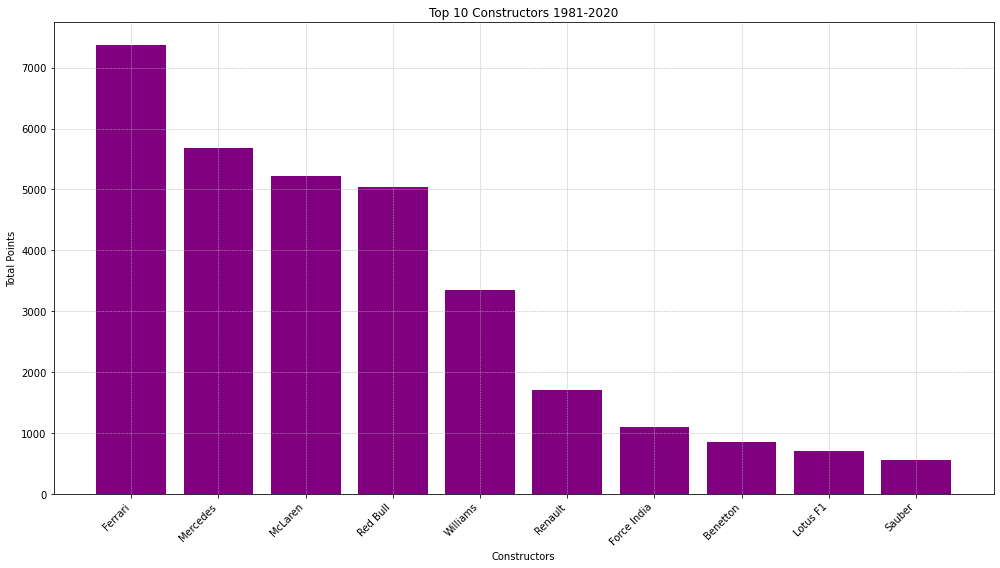

In [36]:
import matplotlib.pyplot as plt

# Assuming the necessary datasets have already been loaded and merged as per previous steps

# Recalculating top 10 constructors using the correct approach for part a
top_10_constructors_1981_2020 = (
    constructor_results[constructor_results['raceId'].isin(filtered_races['raceId'])]
    .groupby('constructorId')['points'].sum()
    .reset_index()
    .merge(constructors[['constructorId', 'name']], on='constructorId')
    .sort_values(by='points', ascending=False)
    .head(10)  # Select top 10 constructors
)

# Plotting the top 10 constructors
plt.figure(figsize=(14, 8))
plt.bar(top_10_constructors_1981_2020['name'], top_10_constructors_1981_2020['points'], color='purple')
plt.title('Top 10 Constructors 1981-2020')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Points')
plt.xlabel('Constructors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


### Question B
### Which three constructors had the highest number of total points between 2001 and 2020? How many total points did each of them get? How do the total number of points for each constructor compare to the average across constructors?

In [37]:
# Filter races for the years 2001-2020
filtered_races1 = races[(races['year'] >= 2001) & (races['year'] <= 2020)]

In [38]:
# Aggregate points for each constructor based on the filtered races
aggregated_points1 = constructor_results[constructor_results['raceId'].isin(filtered_races1['raceId'])] \
    .groupby('constructorId') \
    .agg({'points': 'sum'}) \
    .reset_index()

In [39]:
# Enhance the dataset by merging constructor names
aggregated_points_with_names1 = pd.merge(aggregated_points1, constructors[['constructorId', 'name']], on='constructorId')

In [40]:
# "list_old" encodes values we want to change
# "list_new" encodes the values that will "replace" the old
list_old = ['\\N']
list_new = [-1]

# This command replaces the values of NA
aggregated_points_with_names1 = aggregated_points_with_names1.replace(list_old, list_new)

In [41]:
# Identify the top three constructors based on total points
top_three_constructors1 = aggregated_points_with_names1.sort_values(by='points', ascending=False).head(3)

In [42]:
# Calculate the average points for additional comparison
average_points1 = aggregated_points1['points'].mean()

In [43]:
# Print the results
print(top_three_constructors1)
print(f"Average points across all constructors: {average_points1:.2f}")

    constructorId  points      name
5               6  5862.0   Ferrari
24            131  5685.0  Mercedes
8               9  5043.5  Red Bull
Average points across all constructors: 786.01


So we can see that Ferrari, Mercedes, Red Bull had the highest number of total points between 2001 and 2020

Ferrari got 5862, Mercedes got 5685, Red Bull got 5043.5

The average point for all constructors is about 786. For the top 3 constructors, they all have way higher points compared with the average, but compared with the data from 1981 to 2020, we can see that the average points for all constructors increase dramatically.

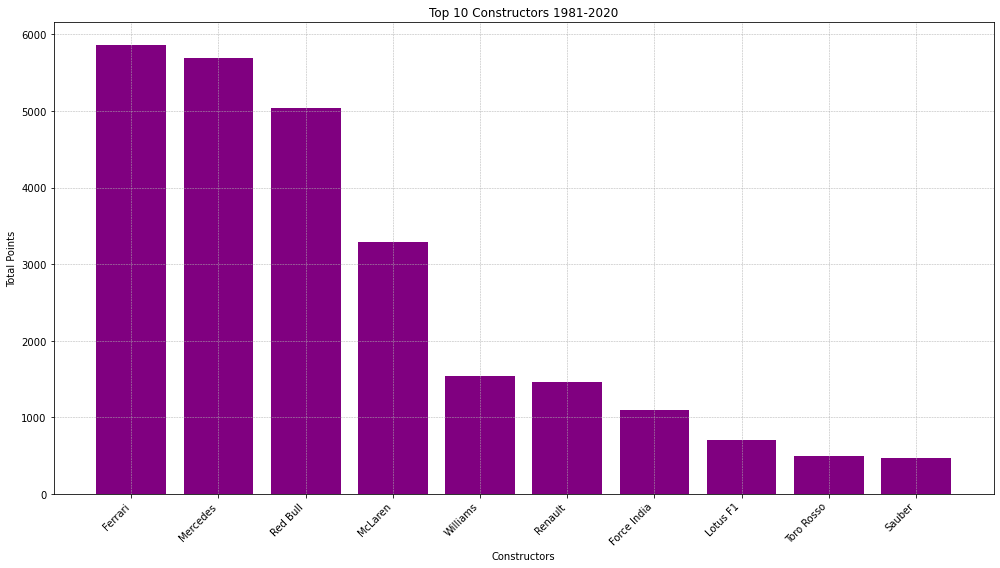

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the necessary datasets have already been loaded and merged as per previous steps

# Recalculating top 10 constructors using the correct approach for part a
top_10_constructors_2001_2020 = (
    constructor_results[constructor_results['raceId'].isin(filtered_races1['raceId'])]
    .groupby('constructorId')['points'].sum()
    .reset_index()
    .merge(constructors[['constructorId', 'name']], on='constructorId')
    .sort_values(by='points', ascending=False)
    .head(10)  # Select top 10 constructors
)

# Plotting the top 10 constructors
plt.figure(figsize=(14, 8))
plt.bar(top_10_constructors_2001_2020['name'], top_10_constructors_2001_2020['points'], color='purple')
plt.title('Top 10 Constructors 1981-2020')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Points')
plt.xlabel('Constructors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


### Question C
### How did the rankings change across the two time periods?

Base on the data we get, we can see that Ferrari remains the top constructor in both time periods, although the total points difference between the two periods indicates Ferrari's significant portion of points were accrued before 2001.

Mercedes maintains its position as the second-highest constructor in both periods. The consistency in their total points indicates that almost all of their points were accrued during the 2001-2020 period.

McLaren was the third-highest constructor in 1981-2020 period. While Red Bull became the third-highest constructor during the 2001-2020 period. But according to the graph, we can see that McLaren and Red Bull are having similar total points.

### Question D
### How many different drivers did Ferrari have between 1981 and 2020?

For Question D, we need to first import other datasets

In [44]:
drivers = pd.read_csv('/Users/gehaojie/Documents/GitHub/qtm531spring2024/Lecture 03/data_raw//drivers.csv')
results = pd.read_csv('/Users/gehaojie/Documents/GitHub/qtm531spring2024/Lecture 03/data_raw//results.csv')

In [50]:
# Merge results with races to filter by year, then 
result_new = results.merge(races[['raceId', 'year']], on='raceId', how='left')
# Then merge with constructors to filter by Ferrari
ferrari_results = result_new.merge(constructors[['constructorId', 'name']], left_on='constructorId', right_on='constructorId', how='left')

# Filter for Ferrari and the years 1981-2020
ferrari_drivers = ferrari_results[(ferrari_results['name'] == 'Ferrari') & (ferrari_results['year'] >= 1981) & (ferrari_results['year'] <= 2020)]

# Count the unique drivers for Ferrari
ferrari_drivers_count = ferrari_drivers['driverId'].nunique()

print(f"Number of different drivers Ferrari had between 1981 and 2020: {ferrari_drivers_count}")

Number of different drivers Ferrari had between 1981 and 2020: 25


So we can see that Ferrai has totally 25 different drivers between 1981 and 2020

### Question E
### What was the best year for Ferrari between 1981 and 2020?

In [62]:
# Aggregate total points for Ferrari by year
ferrari_points_by_year = ferrari_drivers.groupby('year')['points'].sum()

# Identify the year with the highest total points for Ferrari
best_year = ferrari_points_by_year[ferrari_points_by_year == ferrari_points_by_year.max()]
print(best_year)
# Print Result
print(f"The best year for Ferrari between 1981 and 2020 was {best_year.index[0]} with {best_year.values[0]} points.")


year
2018    571.0
Name: points, dtype: float64
The best year for Ferrari between 1981 and 2020 was 2018 with 571.0 points.


From the data we can see thar the best year for Ferrari between 1981 and 2020 was year 2018 with 571.0 points.